# Final Project S17: Telecom User Retention

The goal of this project is to forecast the churn customers to determine which customers could be offered promotions and attempt to keep them with the company.


***Interconnect mainly provides two types of services:***
- Landline communication. The telephone can be connected to several lines simultaneously.
- Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

***Some other services the company provides include:***
- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
- A dedicated technical support line (TechSupport)
- Cloud file storage and data backup (OnlineBackup)
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)

Clients can choose monthly payment or sign a 1- or 2-year contract. 


## The Data

- contract.csv — contract information
- personal.csv — the client's personal data
- internet.csv — information about Internet services
- phone.csv — information about telephone services

The data is from October 1, 2013 to  February 1, 2020

Expounded Data:

***contract.csv:***

- **customerID**: Unique identifier for each customer  

- **BeginDate**: The start date of the customer's subscription  

- **EndDate**: The end date of the subscription (or 'No' if still active)  

- **Type**: Contract type (e.g., 'Month-to-month', 'One year')  

- **PaperlessBilling**: Indicates if the customer is enrolled in paperless billing (Yes/No)  

- **PaymentMethod**: Method used for payments (e.g., 'Electronic check', 'Mailed check')  

- **MonthlyCharges**: The amount charged per month (float)  

- **TotalCharges**: Total amount charged over the subscription period (float) 

***personal.csv:***

- **customerID**: Unique identifier for each customer  

- **gender**: Customer's gender (e.g., Male, Female)  

- **SeniorCitizen**: Indicates if the customer is a senior citizen (1 for Yes, 0 for No)  

- **Partner**: Indicates if the customer has a partner (Yes/No)  

- **Dependents**: Indicates if the customer has dependents (Yes/No)  


***internet.csv:***

- **customerID**: Unique identifier for each customer  

- **InternetService**: Type of internet service subscribed (e.g., DSL, Fiber optic)  

- **OnlineSecurity**: Indicates if the customer has online security service (Yes/No)  

- **OnlineBackup**: Indicates if the customer has online backup service (Yes/No)  

- **DeviceProtection**: Indicates if the customer has device protection service (Yes/No)  

- **TechSupport**: Indicates if the customer has tech support service (Yes/No)  

- **StreamingTV**: Indicates if the customer has a streaming TV service (Yes/No)  

- **StreamingMovies**: Indicates if the customer has a streaming movie service (Yes/No)  


***phone.csv:***

- **customerID**: Unique identifier for each customer  

- **MultipleLines**: Indicates if the customer has multiple phone lines (Yes/No)  


In [2]:
# graphing and data manipulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)


In [3]:
contact = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

## Project Plan:

In [4]:
contact.info()
personal.info()
internet.info()
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   D

***Project Plan after intial look at DFs***

1. Download Data
2. Take an initial look at each data frame
3. Clean data
    - change all yes and no data to 1 and 0
    - change no values in end date to the final date in the data frame and don't include this date as a date customers have left
    - check for duplication of lines
    - check for null data in the data frames
    - change Begin and End Date to dateTime
4. Combined the Data frames into one data frame on customerID
5. Check the new data frame 
    - hasn't increased in lines 
    - no duplicate lines
6. Do feature Engineering
    - add column with length of subscription
    - add a column that totals the number of additional internet services
    - One Hot encoding of Paymentmethod, Type, and InternetService
7. Do EDA
    - Compare and find data distribution of the data
        - Distribution of Monthly Charges
        - Total Charges Distribution
        - Payment Type distribution
        - Paperless billing Distribution
        - Churn rates
        - distribution of montly and yearly charges based on payment type
        - Senior citizen distribution
8. Model the data
    - split the data so confirmation can be done
    - split features and target data
    - Calculate Auc-Roc and Accuracy
    - determine feature importance on the model
9. Conclusion
    - summarize EDA finds
    - summarizes model results

## Data Cleaning

#### Contact

In [5]:
contact.info()
contact.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


***Initial Take Aways:***
- no null data
- "TotalCharges' has a Dtype of object even though its a number
- 'EndDate' has dates and strings. consider how to change this change all 'no's to 2020-02-01 so that i can caluate length of subscription max?
- should I change the date columns to date time.
- look at row duplication
- change PaperlessBilling from yes and no to 1 and 0

In [6]:
# Convert 'BeginDate' and 'EndDate' to datetime
contact['BeginDate'] = pd.to_datetime(contact['BeginDate'], errors='coerce')
contact['EndDate'] = pd.to_datetime(contact['EndDate'], errors='coerce')

# Fill NaT (missing dates) with a default date (e.g., '2020-02-01')
contact['EndDate'] = contact['EndDate'].fillna(pd.to_datetime('2020-02-01'))

In [7]:
# convert 'PaperlessBilling' column
contact['PaperlessBilling'] = contact['PaperlessBilling'].replace({'Yes': 1, 'No': 0})


In [8]:
# Check for non-numeric values in 'TotalCharges'
non_numeric_total_charges = contact[~contact['TotalCharges'].apply(pd.to_numeric, errors='coerce').notna()]

# Display the rows with non-numeric 'TotalCharges'
print(non_numeric_total_charges)


# Convert 'TotalCharges' to numeric (float64)
contact['TotalCharges'] = pd.to_numeric(contact['TotalCharges'], errors='coerce')

contact = contact.dropna()

      customerID  BeginDate    EndDate      Type  PaperlessBilling  \
488   4472-LVYGI 2020-02-01 2020-02-01  Two year                 1   
753   3115-CZMZD 2020-02-01 2020-02-01  Two year                 0   
936   5709-LVOEQ 2020-02-01 2020-02-01  Two year                 0   
1082  4367-NUYAO 2020-02-01 2020-02-01  Two year                 0   
1340  1371-DWPAZ 2020-02-01 2020-02-01  Two year                 0   
3331  7644-OMVMY 2020-02-01 2020-02-01  Two year                 0   
3826  3213-VVOLG 2020-02-01 2020-02-01  Two year                 0   
4380  2520-SGTTA 2020-02-01 2020-02-01  Two year                 0   
5218  2923-ARZLG 2020-02-01 2020-02-01  One year                 1   
6670  4075-WKNIU 2020-02-01 2020-02-01  Two year                 0   
6754  2775-SEFEE 2020-02-01 2020-02-01  Two year                 1   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check  

In [9]:
# Double checking values after the changes above
contact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 494.4+ KB


In [10]:
# Count full row duplicates
display(contact.duplicated().sum())

# Count duplicates based on 'customerID'
display(contact.duplicated(subset=['customerID']).sum())

# Count duplicates based on 'customerID' and 'BeginDate'
display(contact.duplicated(subset=['customerID', 'BeginDate']).sum())

# Count duplicates based on 'customerID', 'BeginDate', and 'MonthlyCharges'
display(contact.duplicated(subset=['customerID', 'BeginDate', 'MonthlyCharges']).sum())

0

0

0

0

In [11]:
# List of the 11 customer IDs that started services on the last day of the date frame
customerID_drop = non_numeric_total_charges['customerID']
display(customerID_drop)

488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object

In [12]:
contact.describe()

,PaperlessBilling,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.592719,64.798208,2283.300441
std,0.491363,30.085974,2266.771362
min,0.000000,18.250000,18.800000
25%,0.000000,35.587500,401.450000
50%,1.000000,70.350000,1397.475000
75%,1.000000,89.862500,3794.737500
max,1.000000,118.750000,8684.800000


***Fixes and Take Aways:***
- There are 11 customers that started plans on the last day of the data frame and these will be taken out since there data won't help predict churn customers
- These customers need to be taken out of the other 3 data frames
- no duplicated full rows or specific customerID, BeginDate, and MonthlyCharges
- About 59% of customers use paperless billing
- On average, customers pay about $64.80 per month.
- Need to watch for newer customers with less total charges that might skew the data. Get a histogram of this to make sure

#### Personal

In [13]:
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


***Initial Take Aways:***
- no null data
- check for row duplication
- take out the dropped customers above
- changing all yes and no to , 1 and 0
- convert female to 1 and male to 0

In [14]:
# Check for full row duplicates
display(personal.duplicated().sum())

# Check for duplicates in the 'customerID' column
display(personal['customerID'].duplicated().sum())

# Check for duplicates based on 'customerID' and 'gender' columns
display(personal.duplicated(subset=['customerID', 'gender']).sum())

0

0

0

In [15]:
# convert 'Partner' and 'Dependents' columns
personal['Partner'] = personal['Partner'].replace({'Yes': 1, 'No': 0})
personal['Dependents'] = personal['Dependents'].replace({'Yes': 1, 'No': 0})

In [16]:
# Convert 'gender' to 1 for Female, 0 for Male
personal['gender'] = personal['gender'].map({'Female': 1, 'Male': 0})

In [17]:
# Drop the rows from 'personal' where 'customerID' is in the list 'customerID_drop'
personal = personal[~personal['customerID'].isin(customerID_drop)]

In [18]:
#checking the change made above
personal.info()
personal.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7032 non-null   object
 1   gender         7032 non-null   int64 
 2   SeniorCitizen  7032 non-null   int64 
 3   Partner        7032 non-null   int64 
 4   Dependents     7032 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 329.6+ KB


,gender,SeniorCitizen,Partner,Dependents
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493
std,0.500014,0.368844,0.499729,0.457629
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


***Take Aways after the Changes:***
- no duplicates
- there is about a 50 - 50 split between gender
- ~ 16% of the customers are senior citizens
- ~ 48% of the customers have a partner
- ~ 30% of the customers have at least one dependent

#### Internet

In [19]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


***Initial Take Aways:***
- no null data
- check for row duplication
- get list of cusomters that don't have any additional services
- make sure that all the customers in this list afe in the contact list
- create new column with total number of additional internet services used

In [20]:
# Replace all "Yes" with 1 and "No" with 0 for relevant columns
internet = internet.replace({'Yes': 1, 'No': 0})

In [21]:
# Check for full row duplicates
display(internet.duplicated().sum())

# Check for duplicates in the 'customerID' column
display(internet['customerID'].duplicated().sum())

# Check for duplicates in the 'customerID' and 'InternetService' column
display(internet.duplicated(subset=['customerID', 'InternetService']).sum())

0

0

0

In [22]:
# Drop the rows from 'internet' where 'customerID' is in the list 'customerID_drop'
internet = internet[~internet['customerID'].isin(customerID_drop)]

In [23]:
# List of columns that represent internet services (i.e., "Yes"/"No" columns)
internet_service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Sum the values across these columns for each row (customer)
internet['total_internet_services'] = internet[internet_service_columns].sum(axis=1)

In [24]:
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customerID               5512 non-null   object
 1   InternetService          5512 non-null   object
 2   OnlineSecurity           5512 non-null   int64 
 3   OnlineBackup             5512 non-null   int64 
 4   DeviceProtection         5512 non-null   int64 
 5   TechSupport              5512 non-null   int64 
 6   StreamingTV              5512 non-null   int64 
 7   StreamingMovies          5512 non-null   int64 
 8   total_internet_services  5512 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 430.6+ KB


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_internet_services
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,0.365566,0.439949,0.438679,0.370102,0.490385,0.495464,2.600145
std,0.481632,0.496426,0.496271,0.482875,0.499953,0.500025,1.700423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


***Initial Take Aways:***
- no duplicates
- took out the list of customers that started their services the last day
- The percentage of customers that use these services will be found after all the data frames are combined

#### Phone

In [25]:
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


- no null values
- check for row duplication
- make sure all the customers in this list are in the contact list

In [26]:
# Replace all "Yes" with 1 and "No" with 0 for relevant columns
phone['MultipleLines'] = phone['MultipleLines'].replace({'Yes': 1, 'No': 0})

In [27]:
# Drop the rows from 'phone' where 'customerID' is in the list 'customerID_drop'
phone = phone[~phone['customerID'].isin(customerID_drop)]

In [28]:
# Check for full row duplicates
display(phone.duplicated().sum())

# Check for duplicates in the 'customerID' column
display(phone['customerID'].duplicated().sum())

# Check for duplicates in the 'customerID' and 'InternetService' column
display(phone.duplicated(subset=['customerID', 'MultipleLines']).sum())

0

0

0

In [29]:
phone.info()
phone.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6352 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6352 non-null   object
 1   MultipleLines  6352 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 148.9+ KB


,MultipleLines
count,6352.000000
mean,0.467097
std,0.498955
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### Combinding cleaned dfs into 1
- check customers that don't have aditional phone or internet services
- double check duplicates
- take aways on percentage of customers using the additional services and lines in relation to the total list of customers

In [30]:
# Merge all DataFrames on 'CustomerID'
df = contact.merge(phone, on='customerID', how='outer') \
                   .merge(internet, on='customerID', how='outer') \
                   .merge(personal, on='customerID', how='outer')

In [31]:
display(df.head())
df.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_internet_services,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,NaN,DSL,...,1.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,0.0,DSL,...,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,0.0,DSL,...,1.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,NaN,DSL,...,0.0,1.0,1.0,0.0,0.0,3.0,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0.0,Fiber optic,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customerID               7032 non-null   object        
 1   BeginDate                7032 non-null   datetime64[ns]
 2   EndDate                  7032 non-null   datetime64[ns]
 3   Type                     7032 non-null   object        
 4   PaperlessBilling         7032 non-null   int64         
 5   PaymentMethod            7032 non-null   object        
 6   MonthlyCharges           7032 non-null   float64       
 7   TotalCharges             7032 non-null   float64       
 8   MultipleLines            6352 non-null   float64       
 9   InternetService          5512 non-null   object        
 10  OnlineSecurity           5512 non-null   float64       
 11  OnlineBackup             5512 non-null   float64       
 12  DeviceProtection         5512 non-

In [32]:
# List of columns to fill with 0
columns_to_fill = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'total_internet_services']

# Fill NaN values with 0 in the specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [33]:
# Check for full row duplicates
display(df.duplicated().sum())

# Check for duplicates in the 'customerID' column
display(df['customerID'].duplicated().sum())

# Check for duplicates in the 'customerID' and 'InternetService' column
display(df.duplicated(subset=['customerID', 'BeginDate']).sum())

0

0

0

In [34]:
df.describe()

,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_internet_services,gender,SeniorCitizen,Partner,Dependents
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.592719,64.798208,2283.300441,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,2.038111,0.495307,0.162400,0.482509,0.298493
std,0.491363,30.085974,2266.771362,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,1.847161,0.500014,0.368844,0.499729,0.457629
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


***Take Aways:***
- Assuming that all customers that are not present in the phone or internet data frames are not using any of these services so the nulls were filled with 0
- Approximately 59% of customers use paperless billing.
- Approximately 42% of customers use multiple lines.
- Approximately 29% of customers use online security.
- Approximately 34% of customers use online backup.
- Approximately 34% of customers use device protection.
- Approximately 29% of customers use tech support.
- Approximately 38% of customers use streaming TV.
- Approximately 39% of customers use streaming movies.
- most customers are using an average of 2 additional internet services

## Feature engineering
1. length of subscription for customer added below
2. number of additional services added above in internet section

In [35]:
df.describe()

,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_internet_services,gender,SeniorCitizen,Partner,Dependents
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.592719,64.798208,2283.300441,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,2.038111,0.495307,0.162400,0.482509,0.298493
std,0.491363,30.085974,2266.771362,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,1.847161,0.500014,0.368844,0.499729,0.457629
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Calculate the maximum subscription length
max_subscription = (df['EndDate'].max() - df['BeginDate'].min()).days
print(max_subscription)

2314


In [37]:
# finding start of data frame date
df['BeginDate'].min()

Timestamp('2013-10-01 00:00:00')

In [38]:
# calculating the length of each customers subscriptions
df['subscription_length'] = df['EndDate'] - df['BeginDate']

# Convert 'subscription_length' from timedelta64[ns] to total days
df['subscription_length'] = df['subscription_length'].dt.days

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customerID               7032 non-null   object        
 1   BeginDate                7032 non-null   datetime64[ns]
 2   EndDate                  7032 non-null   datetime64[ns]
 3   Type                     7032 non-null   object        
 4   PaperlessBilling         7032 non-null   int64         
 5   PaymentMethod            7032 non-null   object        
 6   MonthlyCharges           7032 non-null   float64       
 7   TotalCharges             7032 non-null   float64       
 8   MultipleLines            7032 non-null   float64       
 9   InternetService          7032 non-null   object        
 10  OnlineSecurity           7032 non-null   float64       
 11  OnlineBackup             7032 non-null   float64       
 12  DeviceProtection         7032 non-

In [40]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,total_internet_services,gender,SeniorCitizen,Partner,Dependents,subscription_length
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,0.0,DSL,...,0.0,0.0,0.0,0.0,1.0,1,0,1,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,0.0,DSL,...,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,0.0,DSL,...,0.0,0.0,0.0,0.0,2.0,0,0,0,0,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,0.0,DSL,...,1.0,1.0,0.0,0.0,3.0,0,0,0,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0.0,Fiber optic,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,61


***Full df take away:***
- Since there are the same number of rows in the combined data the contact df contains the full list of customer IDs and there is no worry that there are extras in any of the other dfs.

## EDA
- Visualizing the data distributions and any intial trends that need to be kept in mind before modeling
    

### Distribution of Monthly Charges
In the graph below, there are a large number of clients that are paying a very small amount (around `$20`) most likely on the minimal plan with the least amount of additional services. Then the second broader distribution (centered around `$70–$100`) reflects customers with more services or premium plans.

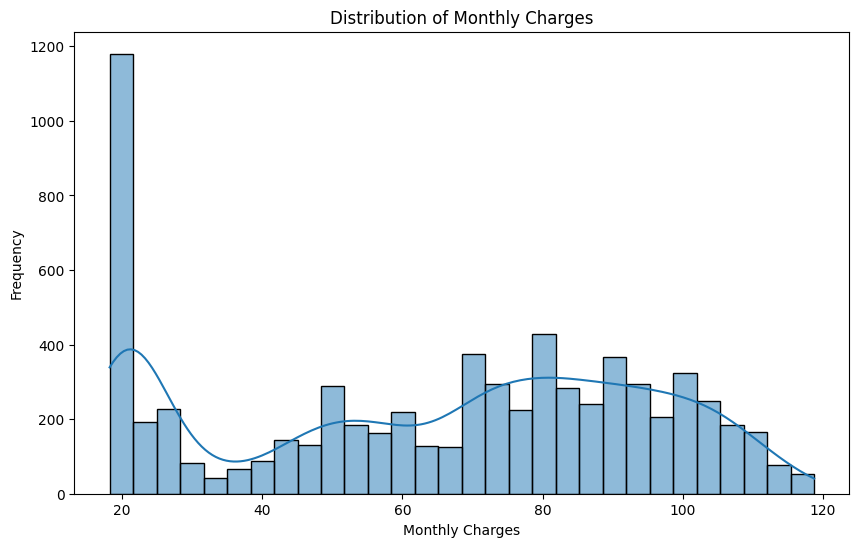

In [41]:
# Plotting distributions for numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

### Total Charge Distribution
In the plot below, the data is positively (right) skewed with a large amount of low total charge customers who are most likely newer customers and then a long tail of customers that have accumulated a larger amount of charges. This shows that a majority of the customers are chruning and the interest is in figuring out what services the long term customers are using and why the short term customers aren't sticking with the company.

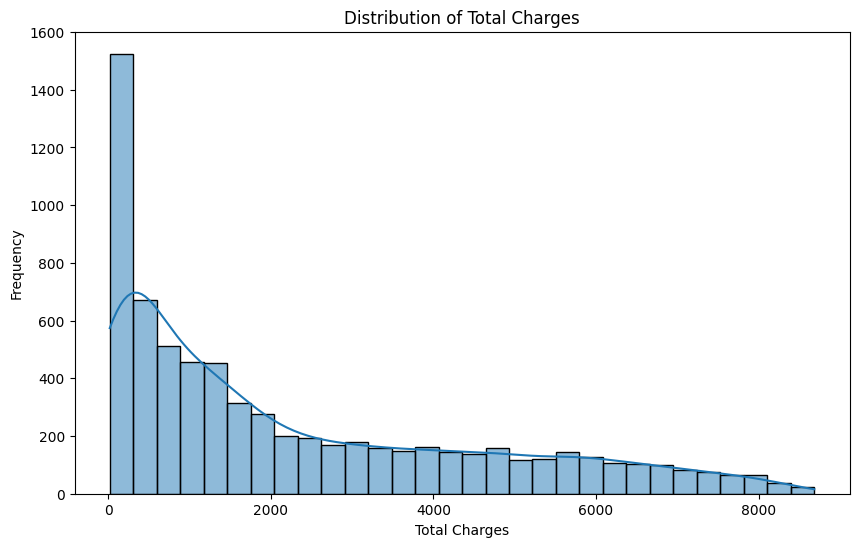

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

### Payment Type Distribution
The graph below shows that more than half the customers (55%)are on a month to month plan and a similar amount of customers are split between the one year (21%) and two year plans (24%). 

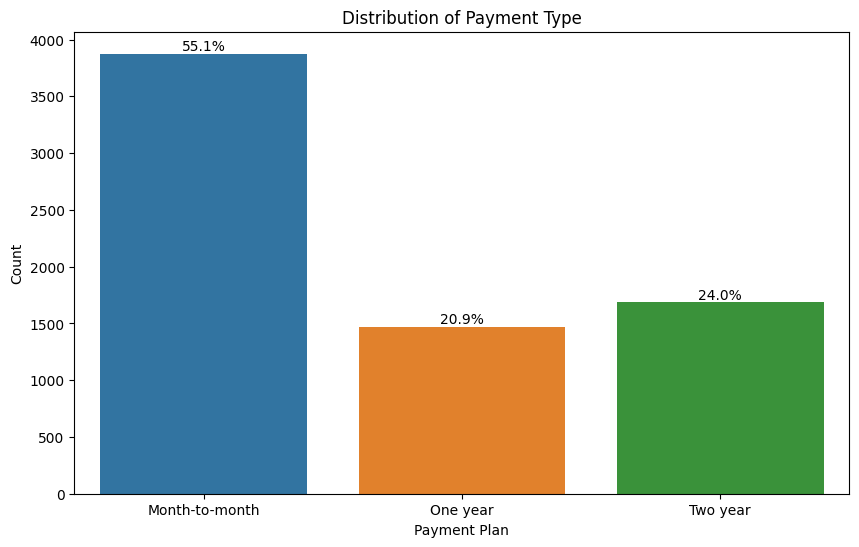

In [43]:
#plot of payment types
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Type', data=df)
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Plan')
plt.ylabel('Count')

#percentages on top of bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Paperless Billing
60% of the customers are using paperless billing and the other 40% are not.

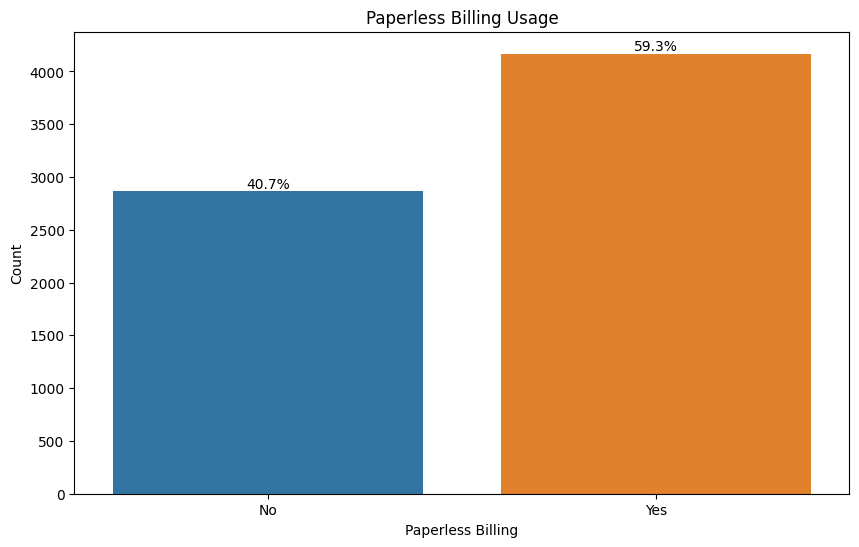

In [44]:
# plot of paperless vs paper billing
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PaperlessBilling', data=df)
plt.title('Paperless Billing Usage')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')

# Set custom tick labels (0 -> No, 1 -> Yes)
ax.set_xticklabels(['No', 'Yes'])

# Add percentages on top of each bar
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

### Correlation Matrix of 'Monthly Charges', 'Total Charges', 'Subscription Length', and 'Total number of Additional Internet Services'
The matrix below helps clarify some of the data that was graphed above. There is a strong correlation that customers that have the longer subscription length have more total charges confirming that the assumption above that there are a smaller group of loyal customers that are sticking with the company a long time and paying a larger amount of charges to the company. Additionally there is a strong correlation that the customers that are using more internet services are also paying more monthly and paying more charges to the company however there not all long term customers are using a lot of additional services.

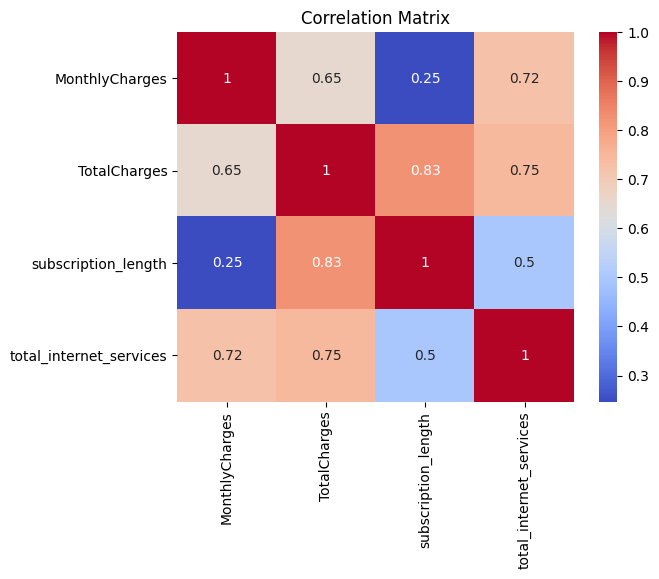

In [45]:
# Correlation matrix for numerical columns
correlation_matrix = df[['MonthlyCharges', 'TotalCharges', 'subscription_length', 'total_internet_services']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Churn by Year

***Graph 3.6.1 shows:***
- 2013 shows 100% churn
- More recent years (2014–2020) show lower churn rates, which is expected — especially since some users from recent years might still be active.
- The trend generally increases over time from 2014 to 2020, which may indicate increasing churn among newer cohorts 

***Graph 3.6.2 shows:***
- There are barely any customers that have data in the df for 2013 and these customers should be excluded
- additionally their are only customers for 2 months of 2020 and these shoudl be excluded also
- Data from 2014 to 2019 show full years of data

#### Churn rate by year

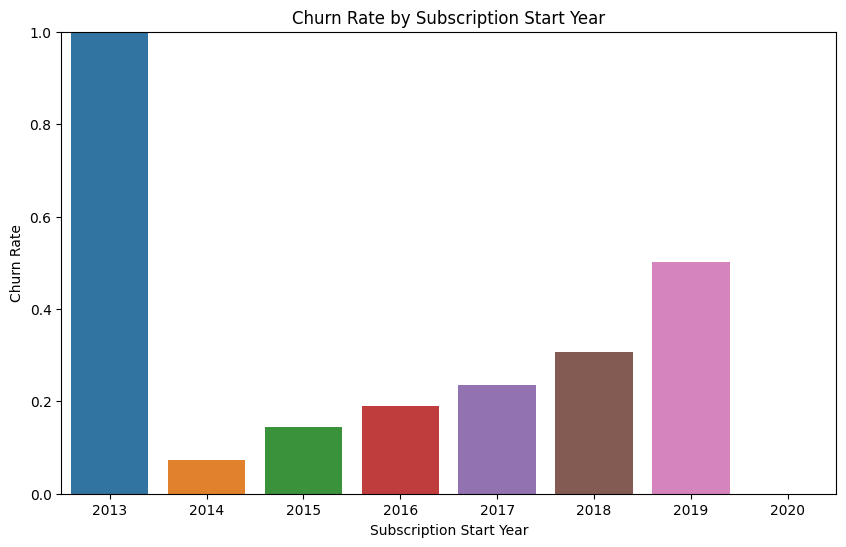

In [46]:
# Define your "today" date 
analysis_date = pd.to_datetime("2020-02-01")

# Extract BeginYear
df['BeginYear'] = df['BeginDate'].dt.year

# Churned = 1 if EndDate exists and is before the analysis date, else 0
df['Churned'] = (df['EndDate'].notnull()) & (df['EndDate'] < analysis_date)
df['Churned'] = df['Churned'].astype(int)

# Group by BeginYear and calculate churn rate
churn_by_year = df.groupby('BeginYear')['Churned'].agg(['sum', 'count'])
churn_by_year['ChurnRate'] = churn_by_year['sum'] / churn_by_year['count']

# Plot churn rate
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_year.index, y='ChurnRate', data=churn_by_year.reset_index())
plt.title('Churn Rate by Subscription Start Year')
plt.xlabel('Subscription Start Year')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

#### Number of Customers by Supscription Start Year

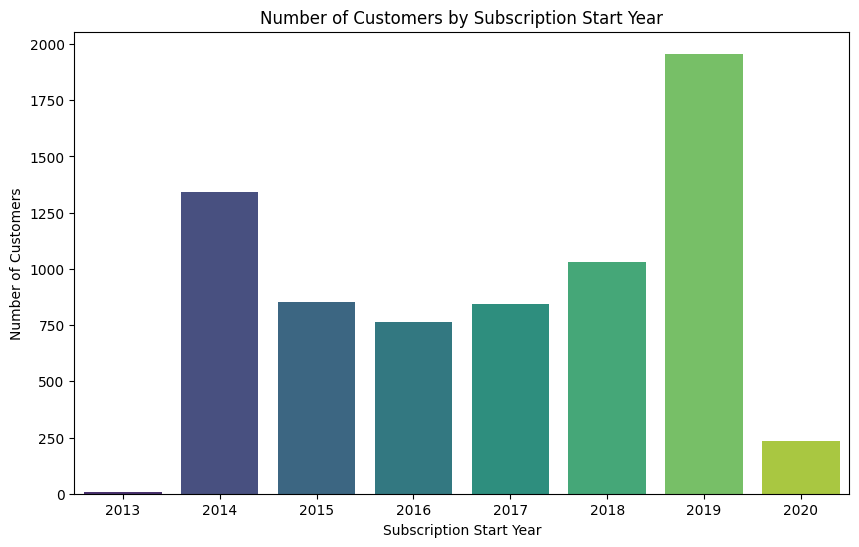

In [47]:
# Plot the distribution of start years
plt.figure(figsize=(10, 6))
sns.countplot(x='BeginYear', data=df, palette='viridis')
plt.title('Number of Customers by Subscription Start Year')
plt.xlabel('Subscription Start Year')
plt.ylabel('Number of Customers')
plt.show()

In [48]:
# Taking out data from 2013 begin Date
df = df[df['BeginDate'].dt.year > 2013]

# Taking out data from 2020
df = df[df['BeginDate'].dt.year != 2020]

### Monthly & Total Charges and Payment Plan

***Monthly Charges:***
- **Month-to-month** users tend to pay higher monthly charges (median around `$70–$80`).
- **One year** and **two year** customers tend to have lower or similar monthly charges, especially **two-year** customers (median closer to `$65`).
- The spread of charges is similar, but **month-to-month** customers show slightly more variability.

***Total Charges:***
- **Two-year** customers have the **highest total charges** (median `$3500+`), which makes sense—they stay longer.
- **Month-to-month** users have the **lowest total charges**, with many outliers.
- **One-year** customers fall somewhere in between.

***Take Away:***
- the company should give promotion to get customers on the 1 or 2 year payment plans

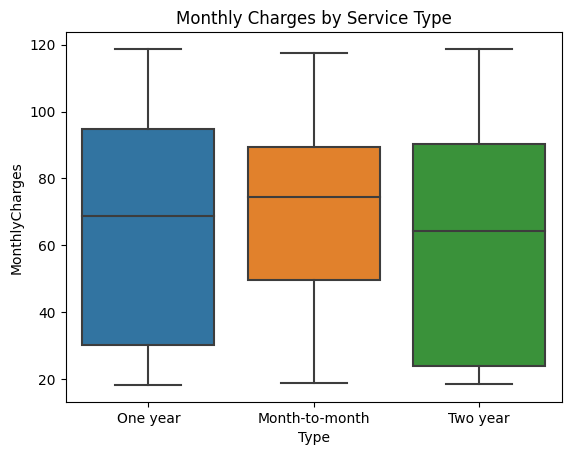

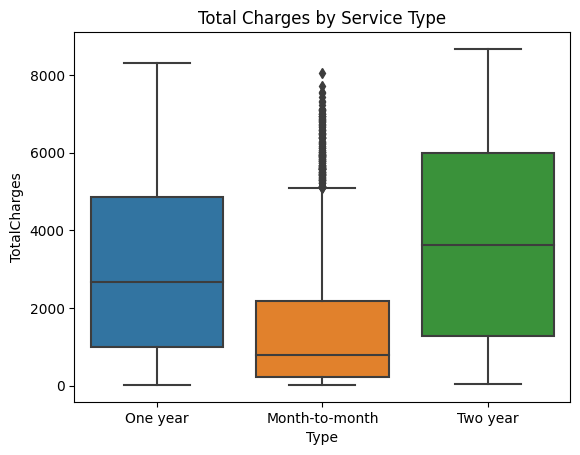

In [49]:
# Comparing `MonthlyCharges` based on `Type`
sns.boxplot(x='Type', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Service Type')
plt.show()

# Comparing `TotalCharges` based on `Type`
sns.boxplot(x='Type', y='TotalCharges', data=df)
plt.title('Total Charges by Service Type')
plt.show()

### Payment Method & Plan by Subscription Length
Based on the first graph below, the automatic payment methods correlate to customers that have a higher subscription length as compared to the the mailed in or electronic checks that aren't automatic.

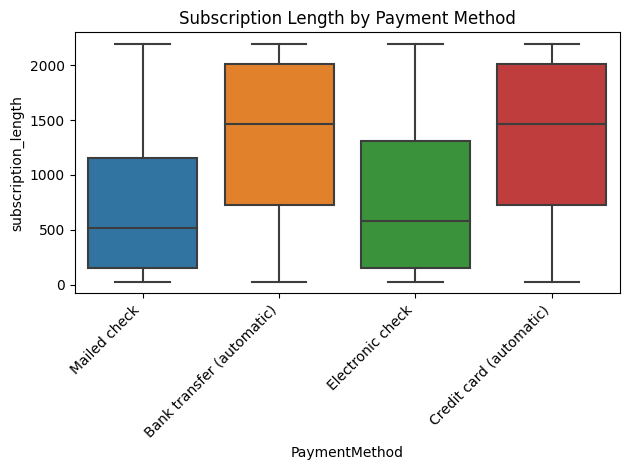

In [50]:
# Plotting subscription length by Payment Method
sns.boxplot(x='PaymentMethod', y='subscription_length', data=df)

# Adjust the x-axis labels for better space and readability
plt.title('Subscription Length by Payment Method')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

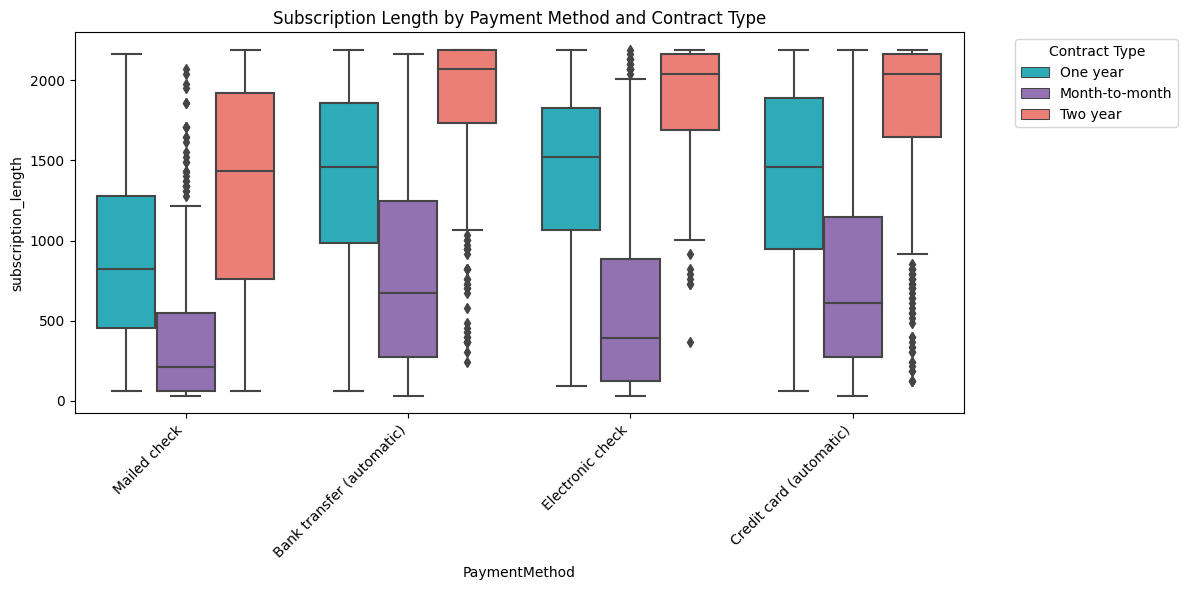

In [51]:
plt.figure(figsize=(12, 6))

# Define a custom palette mapping each contract type to a color
custom_palette = {
    'Month-to-month': '#9467bd',   # purple
    'One year': '#17becf',         # teal
    'Two year': '#ff6f61'          # coral
}

sns.boxplot(
    x='PaymentMethod',
    y='subscription_length',
    hue='Type',
    data=df,
    palette=custom_palette
)

plt.title('Subscription Length by Payment Method and Contract Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Key Takeaways***

**Two-year contracts** (coral):
- Consistently have the **longest subscription lengths** across all payment methods.
- Very little variability; most customers stay for the full duration.

**One-year contracts** (teal):
- Show **moderate subscription lengths**.
- Slightly more variability than two-year plans but still fairly consistent.

**Month-to-month contracts** (purple):
- Display the **shortest and most varied** subscription lengths.
- Many customers churn early, especially those using **Electronic check**.

---

***Payment Method Insights***
- **Bank transfer (automatic)** and **Credit card (automatic)** users tend to **stay longer overall**, especially with longer contracts.
- **Electronic check** users have more churn and **shorter subscription durations**, especially for month-to-month plans.
- **Mailed check** users also show shorter durations, but have **fewer data points**.


### Senior Citizen Distribution
Senior citizens account for 16% of the customers and have a normal ratio compared to none senior citizens for each start year.

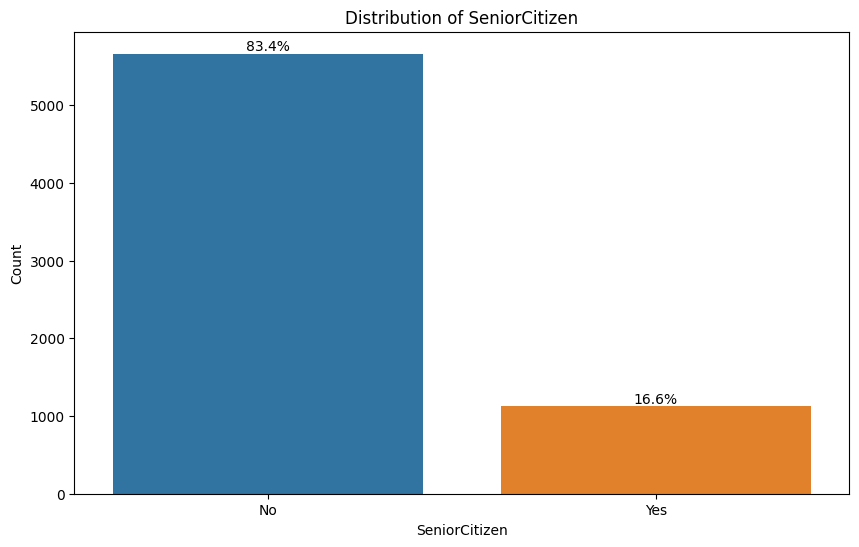

In [52]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeniorCitizen', data=df)
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')

# Set custom tick labels (0 -> No, 1 -> Yes)
ax.set_xticklabels(['No', 'Yes'])

#percentages on top of bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

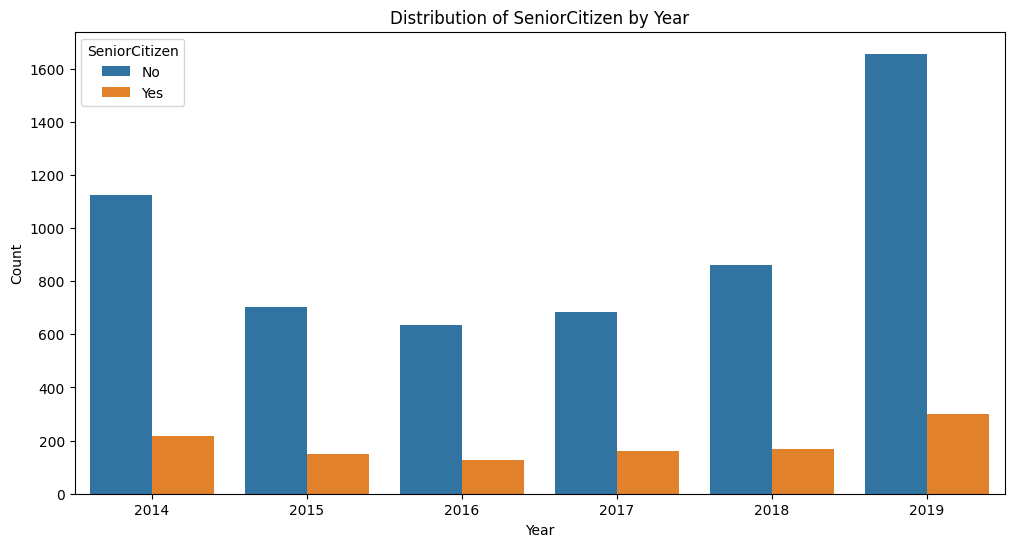

In [53]:
# Plot the distribution of SeniorCitizen by Year
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='BeginYear', hue='SeniorCitizen', data=df, hue_order=[0, 1])

# Set the title and labels
plt.title('Distribution of SeniorCitizen by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Set custom legend labels (0 -> No, 1 -> Yes)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='SeniorCitizen')

plt.show()

## Modeling

AUC-ROC: 0.9347

Classification Report (default threshold):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1017
           1       0.90      0.66      0.76       342

    accuracy                           0.90      1359
   macro avg       0.90      0.82      0.85      1359
weighted avg       0.90      0.90      0.89      1359

Confusion Matrix:
[[991  26]
 [116 226]]
Accuracy: 0.8955

Classification Report (custom threshold = 0.35):
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1017
           1       0.72      0.80      0.76       342

    accuracy                           0.87      1359
   macro avg       0.83      0.85      0.83      1359
weighted avg       0.88      0.87      0.87      1359



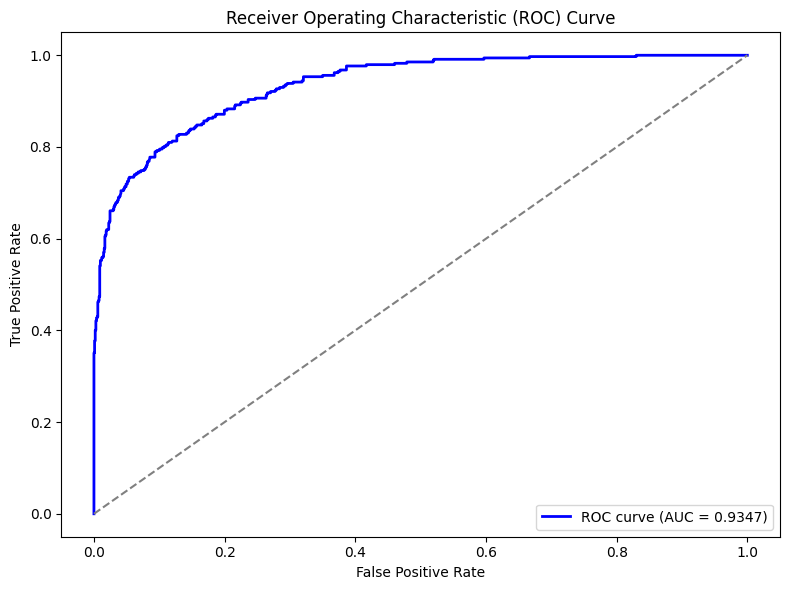

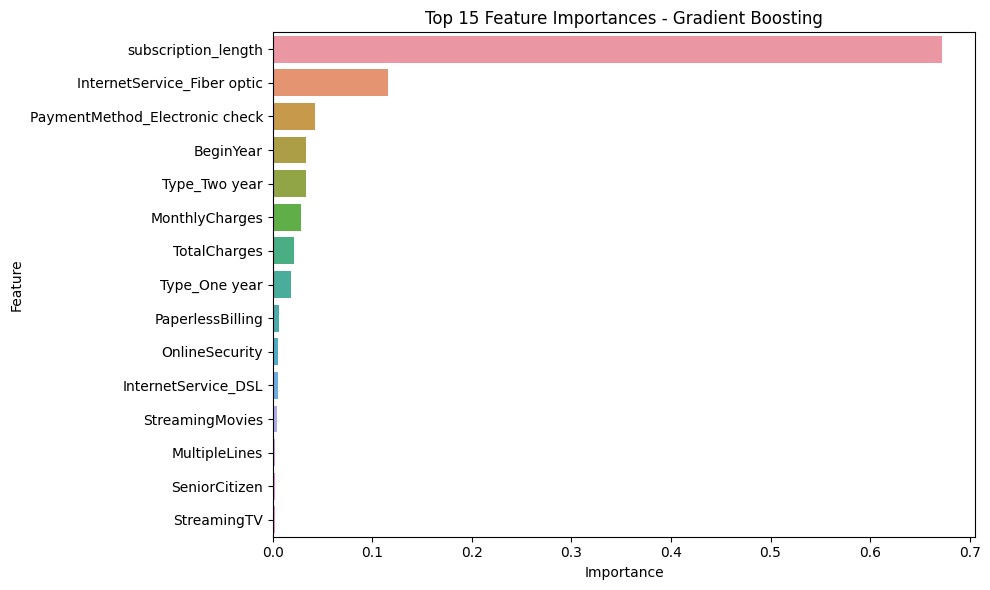


Baseline Logistic Regression AUC-ROC: 0.8568


In [54]:
# Data Preparation
# -------------------------------
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Type', 'PaymentMethod', 'InternetService'], drop_first=True)

# Define features and target
features = df.drop(columns=['customerID', 'Churned', 'BeginDate', 'EndDate'])
target = df['Churned']

# Split data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(features_train, target_train)

# Predict probabilities for AUC-ROC and threshold tuning
target_prob = gb_model.predict_proba(features_test)[:, 1]
target_pred = gb_model.predict(features_test)


# Evaluation Metrics
# -------------------------------
# AUC-ROC Score
roc_auc = roc_auc_score(target_test, target_prob)
print(f"AUC-ROC: {roc_auc:.4f}")

# Classification Report & Confusion Matrix
print("\nClassification Report (default threshold):")
print(classification_report(target_test, target_pred))
print("Confusion Matrix:")
print(confusion_matrix(target_test, target_pred))

# Accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f"Accuracy: {accuracy:.4f}")


# Threshold Tuning
custom_threshold = 0.35
target_pred_custom = (target_prob >= custom_threshold).astype(int)

print("\nClassification Report (custom threshold = 0.35):")
print(classification_report(target_test, target_pred_custom))


# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(target_test, target_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# Feature Importance Plot
importances = gb_model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15))
plt.title('Top 15 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Baseline Model (Logistic Regression)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(features_train, target_train)
lr_prob = lr_model.predict_proba(features_test)[:, 1]
lr_auc = roc_auc_score(target_test, lr_prob)

print(f"\nBaseline Logistic Regression AUC-ROC: {lr_auc:.4f}")


## Conclusion:


The Gradient Boosting Classifier achieved strong performance in predicting customer churn, with an **AUC-ROC score of 0.9347**, indicating excellent class separation capability.

At the **default classification threshold (0.5)**, the model attained an **accuracy of 89.55%**. For non-churned customers, precision and recall were high (**0.90** and **0.97**, respectively), resulting in a strong **F1-score of 0.93**. However, for churned customers, while precision remained high (**0.90**), the **recall was lower at 0.66**, indicating that a significant portion of actual churn cases were missed.

To address this imbalance, a **custom threshold of 0.35** was applied. This adjustment increased the **recall for churned customers to 0.80**, making the model more effective at identifying potential churners. While this change slightly reduced overall accuracy to **87.0%**, it provided a more balanced view of performance, with an improved **macro average recall (0.85)** and **F1-score (0.83)**.

The **confusion matrix** confirmed this trade-off, reducing false negatives from **116 to 68**, which is critical in churn management contexts.

Feature importance analysis revealed that **subscription length** was the most significant predictor of churn, far surpassing other features. Other important factors included **fiber optic internet service**, **electronic check payment method**, **contract type**, and **monthly charges** — offering actionable insights for targeted retention strategies.

In comparison, a baseline Logistic Regression model achieved a lower AUC-ROC of approximately **0.87**, reinforcing the effectiveness of Gradient Boosting for this task.

Overall, the Gradient Boosting Classifier offers a reliable and interpretable solution for churn prediction, especially when optimizing for recall in identifying at-risk customers.

